<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>
</p></center>

<h1><center><font size=8>Cardio Good Fitness</center></font></h1>
<h1><center>Analitis, Iraklis - Project 1</center></h1>

##**Description**
**Objective**

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

**You are expected to do the following:**

Come up with a customer profile (characteristics of a customer) of the different products.\
Perform univariate and multivariate analyses.\
Generate a set of insights and recommendations that will help the company in targeting new customers.
 

##**Data Dictionary**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. 

It contains the following variables:\
*Product* - The model no. of the treadmill\
*Age* -  Age of the customer in no of years\
*Gender* - Gender of the customer\
*Education* - Education of the customer in no. of years\
*Marital Status* - Marital status of the customer\
*Usage* - Avg. # times the customer wants to use the treadmill every week\
*Fitness* - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)\
*Income* - Income of the customer\
*Miles*- Miles that a customer expects to run

### **Importing the necessary libraries**

In [4]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Library to help with data visualization
import seaborn as sns

### **Loading the dataset**

In [5]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Read .csv file to construct DataFrame object
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project1/CardioGoodFitness.csv')

In [7]:
#Copy data object to variable df to maintain original object, if necessary
df = data.copy()

#### **Displaying the first five rows of the dataset**

In [8]:
#Observe head (First 5 rows) 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


- The `Product` column contains the model # of the treadmill
- The `Age` column contains the age of the customer in # of years
- The `Gender` column contains the gender of the customer
- The `Education` column contains the education of the customer in # of years
- The `MaritalStatus` column contains the Marital status of the customer
- The `Usage` column contains the avg. # of times the customer wants to use the treadmill every week
- The `Fitness` column contains the self-rated fitness score of the customer (5 - very fit, 1 - very unfit)
- The `Income` column contains the income of the customer
- The `Miles` column contains the miles that a customer expects to run

#### **Checking the shape of the dataset**

In [9]:
#Observe shape (Number of rows and columns)
df.shape

(180, 9)

- *The dataset has 180 rows and 9 columns*

#### Checking the data types of the columns for the dataset and the count of non-null values

In [10]:
#Observe info (Datatypes and non-null counts by column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- *All the columns have 180 observations and we can initially assume that there are no null or missing values in our dataset*
- *The `Product`, `Gender`, and `MaritalStatus` columns are of object type initially which could either be string values or a mixed column of numeric and non-numeric data. We know from the given Dictionary for this set that these should be categorical strings and can be interpreted by us to be of Pandas data type Categoricals, also known by the Dtype alias 'category'*
- *For quantitative data, Pandas will automatically choose an appropriate data type based on the data in the column, such as float64 or int64, which is what occurred here as all other columns are of type 'int64' and are therefore quantitative data columns.*

#### Changing categorical data columns from Dtype object to category

In [11]:
#Convert each categorical column from Dtype 'object' to 'category'
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

**Let's check the data types and non-null counts again to verify that they were changed and all of our columns now have the proper Dtypes**

In [12]:
#Observe info (Datatypes and non-null counts by column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


- *All columns are now either type int64 or category, as desired.*

#### **Getting the statistical summary for the dataset**

In [13]:
#Observe statistical summary of int64 type columns in dataset (Counts, means, standard deviations, and quartiles)
#include='all' also adds a statistical summary of the categorical columns in dataset (number of unique categories, top occuring category, and frequency of top occurring category)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


- *At first glance, the presence of outliers for the columns `Income` and `Miles` is quite likely as the difference between the maximum and third quartile in both columns is significantly larger than the difference between the third quartiles and their respective medians.*

- ***The standard method for outlier detection is that outliers usually fall outside of the range:\
(Q1-1.5xIQR):(Q3+1.5xIQR)***\
Where Q1 and Q3 are the first and third quartile values (25% and 75%, respectively, on statistical summary output) and IQR is the interquartile range (Q3 - Q1).

- *Knowing this and doing some quick math, we can infer from our first look that all of these quantitative columns probably have outliers since the `Fitness` column has a minimum outside of this standard range and every other column has a maximum outside of this range.*

- *If we assume that this store is based in the United States and we know that the general population of the US has a median age of 38.1 years, we can infer that this dataset is biased towards younger Americans since the third quartile value for the `Age` column is below this and therefore at least 75% of this dataset has an age younger than the median age in the United States.*

- *If we also assume that the values for the `Income` column are given in USD and we know that the general population of the US has a median income of $31,133, then we can also infer that this dataset is biased towards higher-earning Americans since the first quartile for `Income` is greater than this value and therefore at least 75% of this dataset has an income greater than the median income in the United States.*

- *We can observe that both columns `MaritalStatus` and `Gender` have two unique categories, and their top categories are 'Partnered' and 'Male,' respectively. We can also infer from the counts, knowing that we aren't missing values in those columns, that these top categories have 107 and 104 occurrences, respectively, and their competing categories must have 73 and 76 occurrences, respectively. 

**Let's check the count of each unique category in each of the categorical columns.**

In [14]:
#Observe number of unique values
df['Product'].unique()

['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']

- *We can observe that there are 3 types of treadmill product numbers: TM195, TM498, and TM798*


In [15]:
#Observe number of unique values
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

- *We can observe that there are 2 genders in this dataset: Male and Female. We can also infer that Females occur 76 times in the dataset.*

In [16]:
#Observe number of unique values
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

- *We can observe that there are 2 marital statuses in this dataset: Single and Partnered. We can also infer that Single customers occurred 73 times in the dataset.*

In [17]:
#Observe the number of occurrences for each unique value
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

- *We can observe that the models TM195, TM498, and TM798 each have 80, 60, and 40 occurrences each, respectively.*

In [18]:
#Observe the percentage occurrence of each unique value
df['Product'].value_counts(normalize=True)

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64

- *We can observe that the number of occurrences for each treadmill model number in the dataset can be divided into portions of nine, where model number TM195 occurs a plurality of the time at 4/9. We also have TM498 and TM798 trailing behind by representing 3/9 and 2/9 of the dataset, respectively.*

In [19]:
#Observe the percentage occurrence of each unique value
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

- *We can observe that males and females represent 0.577778 and 0.422222 of the dataset, respectively, with males representing a significant majority of the customers.*

In [20]:
#Observe the percentage occurrence of each unique value
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

- *We can observe that partnered and single customers represent 0.594444 and 0.405556 of the dataset, respectively, with partnered customers representing a significant majority of the set.*

**Let's ensure that there are no null values in the dataset like we initially assumed.**

In [21]:
#Observe a sum of all null values in each column
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Let's finally check the skewness of each quantitative column in the dataset.**

In [22]:
#Observe the skewness of each quantitative column
df.skew(numeric_only=True)

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

- *We can observe that the column `Fitness` has a positive skew value but it is approximately symmetrical since its skewness falls between -0.5 and 0.5. We can also observe that columns `Age`, `Education`, and `Usage` are moderately skewed right since their skew values fall between 0.5 and 1.0. Finally, we can also observe that the columns `Income` and `Miles` are highly skewed right since their skew values are greater than 1.0.*

### **Exploratory Data Analysis**

### **Univariate Analysis**

**Quantitative Data**

#### **Observations on Age**

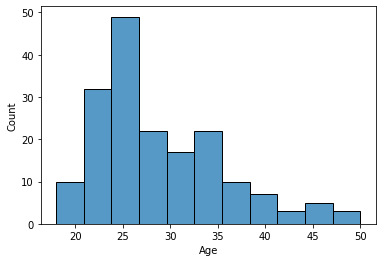

In [23]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Age')

- *As we inferred earlier, we can see in this histogram that the `Age` column is moderately skewed right and this can be observed with the tail seen here.*

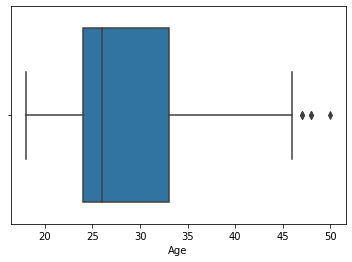

In [24]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Age')

- *As we inferred earlier, we can see that the `Age` column has rightward outliers. We can also see that the quartile range from the median to the third quartile is much larger than from the median to the first quartile.*

#### **Observations on Education**

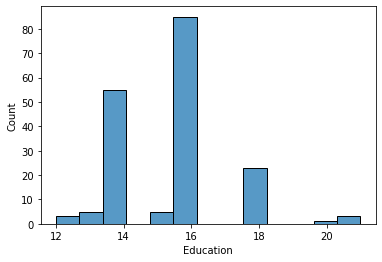

In [25]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Education')

- *As we inferred earlier, we can see from the tail shape that in this histogram the `Education` column is moderately skewed right.*

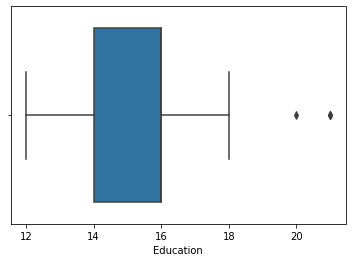

In [26]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Education')

- *As we inferred earlier, we can see that the `Education` column has rightward outliers.*

#### **Observations on Usage**

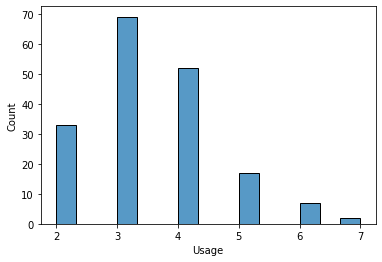

In [27]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Usage')

- *As we inferred earlier, we can see in this histogram that the `Usage` column is moderately skewed right.*

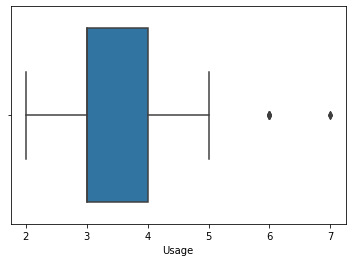

In [28]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Usage')

- *As with the previous columns, we are able to see the rightward outliers in the `Usage` column.*

#### **Observations on Fitness**

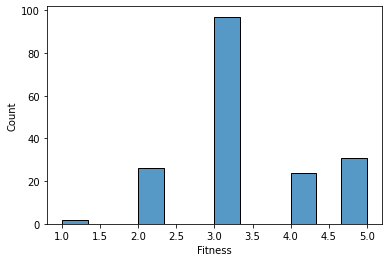

In [29]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Fitness')

- *As we inferred earlier, we can see in this histogram that the `Fitness` column is approximately symmetric.*

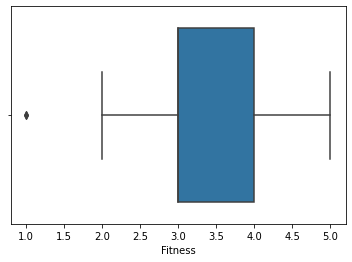

In [30]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Fitness')

- *We are able to see the leftward outlier for column `Fitness` as we had predicected earlier.*

#### **Observations on Income**

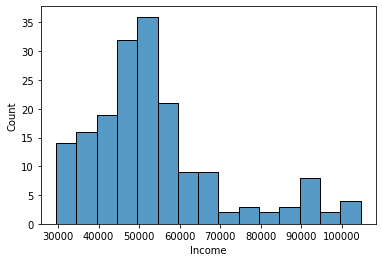

In [31]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Income')

- *As we inferred earlier, we can see in this histogram that the `Income` column is rightly skewed.*

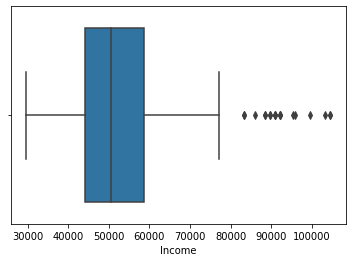

In [32]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Income')

- *We are able to observe the many rightward outliers from column `Income` as we had predicted earlier.*

#### **Observations on Miles**

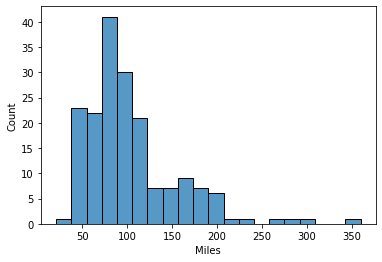

In [33]:
#Observe histogram plot of selected quantitative values from column (Returns a distribution of the occurrences of values within bins)
sns.histplot(data=df,x='Miles')

- *As we inferred earlier, we can see in this histogram that the `Miles` column is rightly skewed.*

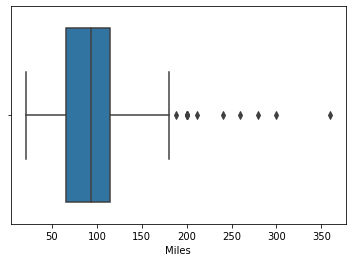

In [34]:
#Observe boxplot of selected quantitative values from column (Returns a boxplot showcasing quartiles and labelling outliers)
sns.boxplot(data=df,x='Miles')

- *We can see that there are rightward outliers in the `Miles` column.*

**Categorical Data**

#### **Observations on Product**

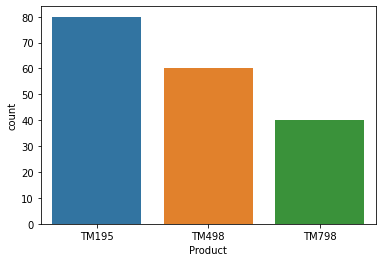

In [35]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Product')

- *As we concluded earlier, the TM195 is the most popular model number in this set.*

#### **Observations on Gender**

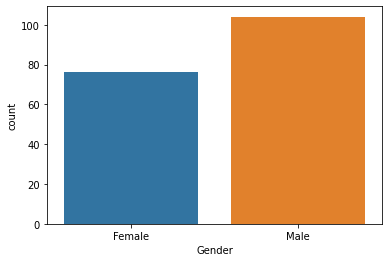

In [36]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='Gender')

- *As we concluded earlier, males are the majority of customers in this data set.*

#### **Observations on MaritalStatus**

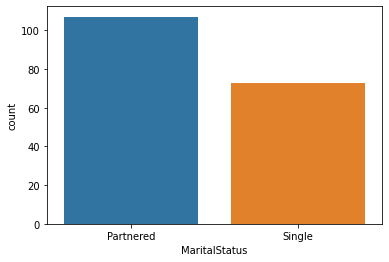

In [37]:
#Observe countplot of selected categorical values from column (Returns a frequency distribution)
sns.countplot(data=df,x='MaritalStatus')

- *As we concluded earlier, the partnered customers are the majority in this data set.*

### **Bivariate Analysis**

**Let us plot bivariate charts between variables to understand their interaction with each other.**

In [38]:
#Observe a correlation table between all of the quantitative value columns in our set
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


- *At first glance of the correlation values between the quantitative value colums, we can see that all of the correlation values are positive and we are not working with any negative correlations <0.*
- *The `Miles` column is highly positively correlated with both columns `Usage` and `Fitness` since the correlation values are >0.7. We also see various columns with moderate positive correlation values between 0.5 and 0.7, such as between `Fitness` and `Usage`. Correlation values between 0.3 and 0.5 can be said to have low positive correlation, and anything less than that can be said to not have significant correlation to each other.*
- *A heat map may be a better way to visualize all of these correlation values relative to each other as the highly correlated columns will stand out from the non-correlated and low correlated columns.*

#### **Correlation by Heatmap**

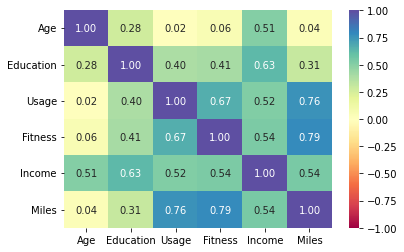

In [39]:
#Create an array of string names of the quantitative value columns
num_var = ['Age','Education','Usage','Fitness','Income','Miles']
#Check the correlation between these quantitative value columns
corr = df[num_var].corr()
#Plot the heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- *As expected from the previous table, `Miles` shows high correlation to both `Usage` and `Fitness`.*
- *We also see that the `Income` column is moderately correlated with `Education`, which would be expected, but we also see that `Income` is moderately correlated with columns `Age`, `Usage`, `Fitness`, and `Miles`.* 
- *We also see that the columns `Usage` and `Fitness` are moderately correlated to each other, which also would be intuitively expected.*
- *We also see that the `Education` column has low correlation with columns `Usage`, `Fitness`, and `Miles`. `Education also has no significant correlation with `Age`.*
- *We see that `Age` has near zero correlation with `Usage`, `Fitness`, and `Miles`. These three comparisons are also the lowest correlation values in the entire set.*

#### **Bivariate Scatter Plots**

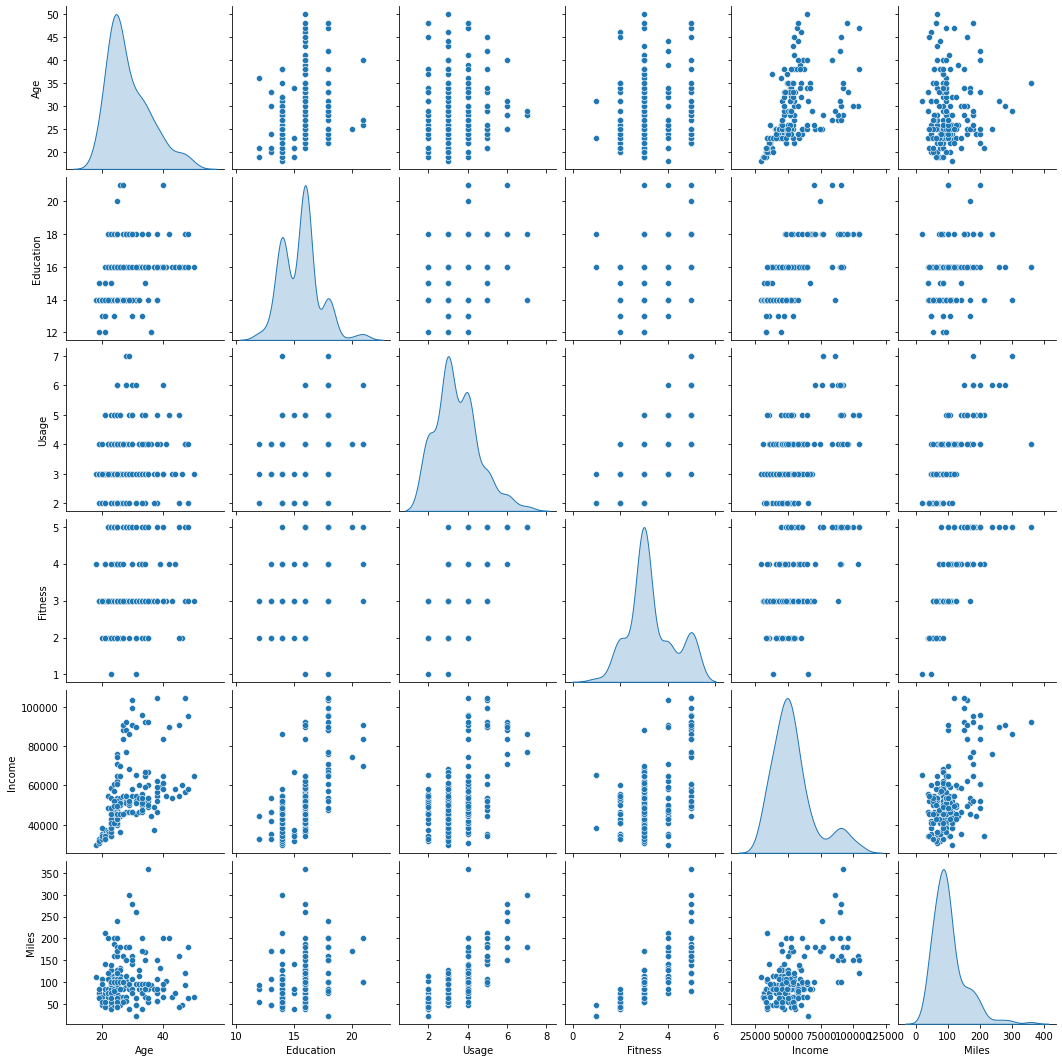

In [40]:
#Observe a pairplot between all of the numerical value columns
sns.pairplot(data=df[num_var], diag_kind="kde")

- *All of the pairs that we observe look to confirm what we have already determined from the heatmap and none of these pairs seem to suggest anything different. As expected, we see that the most obviously correlated columns are between `Miles` and both `Usage` and `Fitness`.*

##Gender and Product##

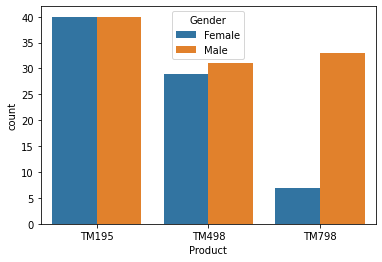

In [41]:
sns.countplot(x=df['Product'], hue=df['Gender'])

- *We can see again that the most popular product is the lowest model TM195, regardless of gender and that the count for the middle product number is similar across the two genders, but slightly favored by males. Finally, we also see that the highest model TM798 is dominated by males.*

#### **Miles and the categorical value columns**

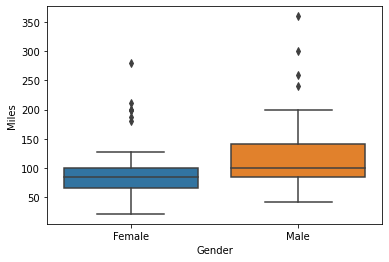

In [42]:
#Observe a boxplot between two values
sns.boxplot(x=df['Gender'], y=df['Miles'])

- *We can see that the IQR is tighter (standard deviation is lower) and the median and Q1 are lower for miles that female customers expect to run.*

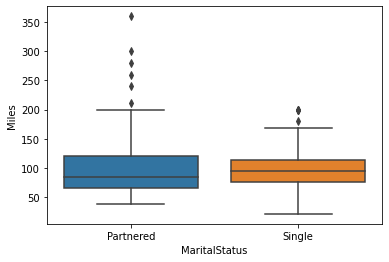

In [43]:
#Observe a boxplot between two values
sns.boxplot(x=df['MaritalStatus'], y=df['Miles'])

- *We can see that the IQR is tighter (standard deviation is lower) and the median and Q1 are higher for miles that single customers expect to run. We also see that the partnered customers have significantly more outlers than the single customers.*

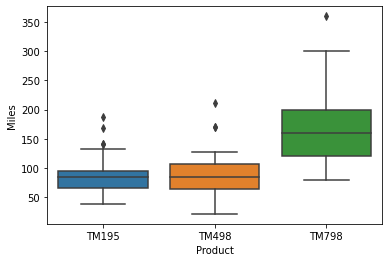

In [44]:
#Observe a boxplot between two values
sns.boxplot(x=df['Product'], y=df['Miles'])

- *From this we can see that with increasing model numbers, customers will expect to run more miles and we also see that there is increasing variance in the miles as the model number increases. The customers who own the highest model number, seem to expect to run significantly more miles than both of the other model numbers.*

#### **Usage/Fitness and the categorical value columns**

- *Since we already observed that the `Miles` column is highly correlated to both the `Usage` and `Fitness` columns, we might expect to see similar bivariate outputs with both of these columns and the categorical data.*

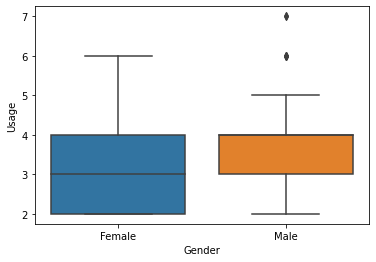

In [45]:
#Observe a boxplot between two values
sns.boxplot(x=df['Gender'], y=df['Usage'])

- *We notice that there are only positive outliers for the `Usage` of the male customers.*

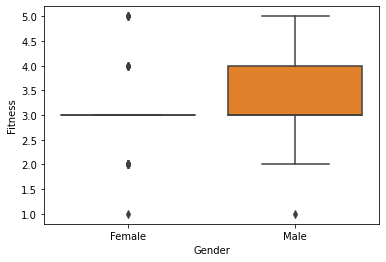

In [46]:
#Observe a boxplot between two values
sns.boxplot(x=df['Gender'], y=df['Fitness'])

- *We also notice that for `Fitness`, the females have positive and negative outliers, with all of the statistically relevant data existing at the middle self-reporting value of 3.0, while the males have a an actual spread for their boxplot and negative outliers.

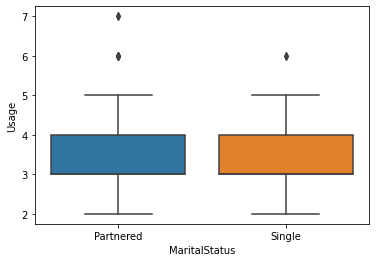

In [47]:
#Observe a boxplot between two values
sns.boxplot(x=df['MaritalStatus'], y=df['Usage'])

- *We notice that both marital statuses have similar spreads for `Usage` and both have positive outliers.*

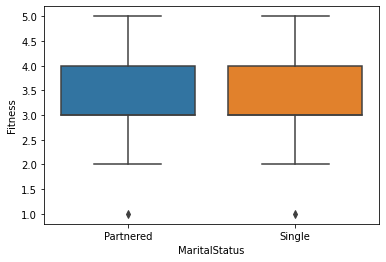

In [48]:
#Observe a boxplot between two values
sns.boxplot(x=df['MaritalStatus'], y=df['Fitness'])

- *The spreads appear to be similar for `Fitness`, regardless of `MaritalStatus`.*

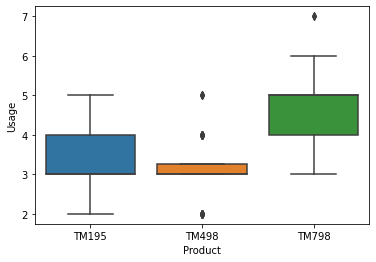

In [49]:
#Observe a boxplot between two values
sns.boxplot(x=df['Product'], y=df['Usage'])

- *Similar to the bivariate output we saw between `Product` and `Miles`, we see that the TM798 has a spread set higher than the other two products, suggesting that the customers that own this model use it more. Interestingly with this bivariate comparison, we can see that there are negative and positive outliers for the middle product number and that all of the statistically relevant `Usage` data for that product number exist in a very short spread above 3.0.*

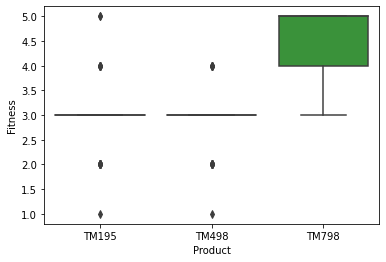

In [50]:
#Observe a boxplot between two values
sns.boxplot(x=df['Product'], y=df['Fitness'])

- *With these spreads we can see that both of the lower product numbers have positive and negative outliers for `Fitness` and the only statistically signifcant data exists at 3.0 for fitness, while the highest model number has a much higher spread and no outliers.*

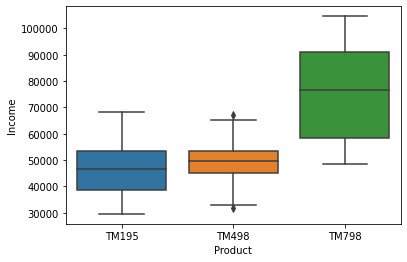

In [51]:
#Observe a boxplot between two values
sns.boxplot(x=df['Product'], y=df['Income'])

- *With these spreads we can see that both of the lower models have similar median incomes, but the lowest model has a significantly larger spread and the middle has positive and negative outliers. The TM798 is dominated by higher earning customers, which would make sense, and also has a much wider spread than the other two models.*

### **Multivariate Analysis**

**We can now try visualizing some of these comparisons across additional variables and see if we notice anything else.**

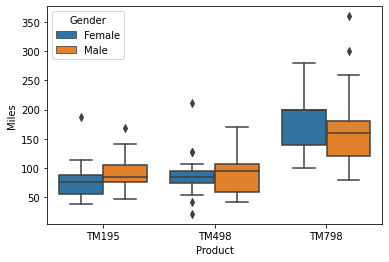

In [52]:
sns.boxplot(x=df['Product'], y=df['Miles'], hue=df['Gender'])

- *Further confirming some of what we have already seen in the bivariate analysis, but now showing a side by side for gender. The TM798 still seems to dominate mileage expected by the customers, but we can also see that the female spread for that model is slightly higher than the males when excluding the outliers. We also see that all of the positive and negative outliers for the TM498 that we noticed earlier are from the female customers.*

**Let's now check the `Product` and `Gender` categories in a similar way, but for both `Income` and `Education` and see if we see any patterns.**

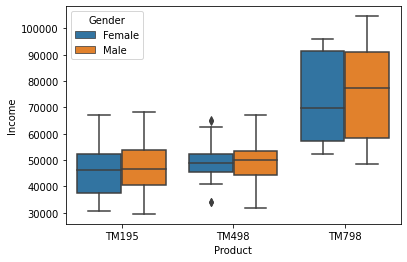

In [53]:
sns.boxplot(x=df['Product'], y=df['Income'], hue=df['Gender'])

- *Now we can also see that the TM798 has a much higher spread for income, suggesting that the higher earning customers of both genders generally purchased the highest model number, which would make sense. We also see positive and negative outliers for income for the middle model number purchased by women, similarly to the mileage outliers that we observed above. These are also the only outliers in this comparison and the middle model number noticeably has the smaller spread of the three models for either gender.*

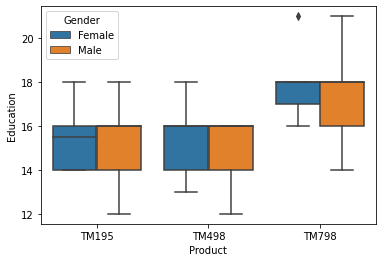

In [54]:
sns.boxplot(x=df['Product'], y=df['Education'], hue=df['Gender'])

- *Similarly to the `Income` analysis, we see that the highest model number is favored by those with more education, regardless of gender. We also see that there exists positive outliers for females only in the highest model number. We also notice that the two lower model numbers have effectively the same IQR, regardless of gender or model.*

### **Actionable Insights and Recommendations**

#### **Insights**

Assuming that we are in the United States, then the primary education system is normally 12 years. We have also already pointed out that this dataset is biased towards wealthier Americans due to the country's average income. The main objective for a business like this is to sell a product and the secondary objective would be sell a product that the users are happy with to avoid having to accept returns while also developing customer loyalty when that customer needs another similar product. Thirdly, we would like to see regular use of the product and therefore should market each product appropriately to the intended users. All of these goals will result in a high volume of sales that do not get returned and actually get used, which would hopefully also have the consequence of a good reputation for the company, customer loyalty, and customer recommendations to other people.

We have been able to conclude that -  

1. The TM195 is the most popular model number. Males and partnered customers represent more of the set of customers than females or singles, respectively.
2. Higher earners and higher educated customers tended to buy the TM798, while we also noticed that those with the TM798 used the product more than the other models, generally ran more miles on it, and were in generally better shape. 
3. We also noticed that the females in this dataset generally did not purchase the TM798 and generally speaking the females had lower usage and mileage than the males, with slight variations depending on what model they were using.


#### **Recommendations to business**

1. Since the highest model number is so heavily dominated by males, but that model had the highest usage and mileage, it may be a fruitful strategy to better market this model towards women to expand the number of customers using that model. 
2. It may also be a fruitful business strategy to target higher education institutions and students at these institutions for all models since this set was somewhat biased towards those that have education beyond primary school, with an emphasis on the highest model TM798 since it is so popular with these types of customers. Conversely, we can also say that we can expand our potential buyers by marketing all models, but especially the lower models, to those that are lower-earning and/or have less education since that seems to be an untapped market and the lower models have already been favored by such customers.
3. The TM798 may be best to market towards those that are in higher levels of fitness based on the data, but we can also make the suggestion that this model was used the most by their customers and therefore if you want to get into better shape and use your treadmill more the TM798 should be the product that the company suggests to potential customers; however, this relationship is likely a case of self-selection since those that are in better shape are probably using fitness equipment more and running more miles in general, but it would not be inaccurate to point out that this model got more usage.

####  **Further Analysis that can be done**

1. It would be great to poll these customers with their actual satisfaction with the product so that we can use that data to better develop customer profiles per each model and future models.
2. We can also drop all of the outliers from the dataset for further analysis and rerun some of our bivariate and multivariate analyses
3. This analysis was not all-inclusive so there are certainly other comparisons that we can keep doing to get a better understanding of our customer profile that has already been developed here and possibly make better suggestions to the business.